In [ ]:

model_taba=CamembertForSequenceClassification.from_pretrained("./taba_model_cross_validation/Bon_Consultation/checkpoint-896")
model_prof=CamembertForSequenceClassification.from_pretrained("./prof_model_cross_validation/URO/checkpoint-464")
model_hyper=preannotate_hyper
model_diab=preannotate_diab
model_cardia=CamembertForSequenceClassification.from_pretrained("./cardia_model_cross_validation/checkpoint-904")
model_copd=preannotate_copd
model_fam=preannotate_family_cancer

In [212]:
import torch
from transformers import CamembertModel, CamembertTokenizer
tokenizer = CamembertTokenizer.from_pretrained("/donnees/share/models/camembert-large")
from transformers import CamembertForSequenceClassification, TrainingArguments, Trainer
model2=CamembertForSequenceClassification.from_pretrained("/donnees/home/dong/improved/hyper_model/checkpoint-200")


2024-06-27 15:59:24.576615: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 15:59:24.671868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 15:59:26.134290: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [213]:
o1="./preannotation2/prodigy_preannotation_copd1.jsonl"
o2="./preannotation2/prodigy_preannotation_copd2.jsonl"
r1="./result/diab_test_1.jsonl"
r2="./result/diab_test_2.jsonl" 

In [214]:
lo1=list()
import json 

with open(o1, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lo1.append(json.loads(i))

In [215]:
lo1

[{'text': 'Médecin',
  'meta': {'TYPE_DOC': 'DXCARE:DXCARE:DIVERS_AUTRES',
   'ID_ENTREPOT': '105693351',
   'CODE_LINE': 30,
   'annotator': None,
   'annotator2': None},
  'options': [{'id': '0', 'text': 'absence_taba'},
   {'id': '1', 'text': 'presence_taba'},
   {'id': '2', 'text': 'ancien_taba'},
   {'id': '3', 'text': 'absence_prof'},
   {'id': '4', 'text': 'presence_prof'},
   {'id': '5', 'text': 'absence_diab'},
   {'id': '6', 'text': 'presence_diab'},
   {'id': '7', 'text': 'absence_hyper'},
   {'id': '8', 'text': 'presence_hyper'},
   {'id': '9', 'text': 'absence_cardia'},
   {'id': '10', 'text': 'presence_cardia'},
   {'id': '11', 'text': 'absence_copd'},
   {'id': '12', 'text': 'presence_copd'},
   {'id': '13', 'text': 'absence_fam'},
   {'id': '14', 'text': 'presence_fam'}],
  '_input_hash': -30,
  '_task_hash': -30,
  '_view_id': 'choice',
  'accept': [],
  'answer': '',
  '_timestamp': 30},
 {'text': "SSR-Réunion de synthèse SSR-Réunion de synthèse Date entrée dans

In [132]:
c=0
lo11=list()
for d in lo1:
    c+=1
    print(str(c)+"/"+str(len(lo1)), end="\r")
    inputs = tokenizer(d["text"], max_length=500, truncation=True, return_tensors="pt")
    logits = model2(**inputs).logits
    predicted_class_id = logits.argmax().item()
    if predicted_class_id==0:
        d["accept"] = []
    else:
        d["accept"] = [str(predicted_class_id+6)]
    lo11.append(d)

In [133]:
lo11

[{'text': 'Médecin',
  'meta': {'TYPE_DOC': 'DXCARE:DXCARE:DIVERS_AUTRES',
   'ID_ENTREPOT': '105693351',
   'CODE_LINE': 30,
   'annotator': None,
   'annotator2': None},
  'options': [{'id': '0', 'text': 'absence_taba'},
   {'id': '1', 'text': 'presence_taba'},
   {'id': '2', 'text': 'ancien_taba'},
   {'id': '3', 'text': 'absence_prof'},
   {'id': '4', 'text': 'presence_prof'},
   {'id': '5', 'text': 'absence_diab'},
   {'id': '6', 'text': 'presence_diab'},
   {'id': '7', 'text': 'absence_hyper'},
   {'id': '8', 'text': 'presence_hyper'},
   {'id': '9', 'text': 'absence_cardia'},
   {'id': '10', 'text': 'presence_cardia'},
   {'id': '11', 'text': 'absence_copd'},
   {'id': '12', 'text': 'presence_copd'},
   {'id': '13', 'text': 'absence_fam'},
   {'id': '14', 'text': 'presence_fam'}],
  '_input_hash': -30,
  '_task_hash': -30,
  '_view_id': 'choice',
  'accept': [],
  'answer': '',
  '_timestamp': 30},
 {'text': "SSR-Réunion de synthèse SSR-Réunion de synthèse Date entrée dans

In [3]:
lo2=list()
import json 

with open(o2, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lo2.append(json.loads(i))

In [135]:
c=0
lo22=list()
for d in lo2:
    c+=1
    print(str(c)+"/"+str(len(lo2)), end="\r")
    inputs = tokenizer(d["text"], max_length=500, truncation=True, return_tensors="pt")
    logits = model2(**inputs).logits
    predicted_class_id = logits.argmax().item()
    if predicted_class_id==0:
        d["accept"] = []
    else:
        d["accept"] = [str(predicted_class_id+6)]
    lo22.append(d)

In [338]:
lr1=list()
import json 

with open(r1, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr1.append(json.loads(i))

In [339]:
lr2=list()
import json 

with open(r2, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr2.append(json.loads(i))

In [6]:
lr1

[{'text': "Le: 05/04/2010 à 23:17 Avec: , CHIRURGIE UROLOGIQUE , CE UROLOGIE PL astreinte uro t fardoun patient de 74 ans, vit a domicile, retraite ( PTT) , automnome vient pour RAU douloureuse sur caillotage ( globe douloureux 1.3L) atcd: meniere, hta, dyslipidemie, ss kardegic 75 , non tabagique, pas d'atcd fx K pas d'atcd uro ( CNA, RAU... ) , pas d'IU recente, pas de fievre recente pas de trauma notion d'une hematurie totale isolee totale il y a 3 ans , n'a pas consulté histoire: apparition hematurie macroscopique depuis hier, totale, caillots+ TM irritatifs récents ( BM, PKD 2h, PKN 1 imperiosités ) TM chronique obstructif ( jet faible, miction en 2 tps, gouttes+, DP) sans incontinence a l'arrivée: apyretique, miction par regorgement donc sondé aux bur ( double courant + lavage) evacuation 1.3L + caillots patient en bon etat general, bonne constantes hemodynamiques, pas de lombalgies OGE: sensibilite testis G, kyste epididyme G TR: prostate 30g sensible, soupple, symetrique 

In [7]:
lr2

[{'text': "Le: 05/04/2010 à 23:17 Avec: , CHIRURGIE UROLOGIQUE , CE UROLOGIE PL astreinte uro t fardoun patient de 74 ans, vit a domicile, retraite ( PTT) , automnome vient pour RAU douloureuse sur caillotage ( globe douloureux 1.3L) atcd: meniere, hta, dyslipidemie, ss kardegic 75 , non tabagique, pas d'atcd fx K pas d'atcd uro ( CNA, RAU... ) , pas d'IU recente, pas de fievre recente pas de trauma notion d'une hematurie totale isolee totale il y a 3 ans , n'a pas consulté histoire: apparition hematurie macroscopique depuis hier, totale, caillots+ TM irritatifs récents ( BM, PKD 2h, PKN 1 imperiosités ) TM chronique obstructif ( jet faible, miction en 2 tps, gouttes+, DP) sans incontinence a l'arrivée: apyretique, miction par regorgement donc sondé aux bur ( double courant + lavage) evacuation 1.3L + caillots patient en bon etat general, bonne constantes hemodynamiques, pas de lombalgies OGE: sensibilite testis G, kyste epididyme G TR: prostate 30g sensible, soupple, symetrique 

## calculate cohen kappa inter-annotateur

In [466]:
r1="./result/cardia_inter1.jsonl"
r2="./result/cardia_inter2.jsonl"

In [467]:
lr1=list()
import json 

with open(r1, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr1.append(json.loads(i))
    
lr2=list()
import json 

with open(r2, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr2.append(json.loads(i))  

In [179]:
lr1=list()
import json 

#with open("annotation_result/copd_annotation_result1.jsonl", "r", encoding="utf-8") as t1:
with open("../../improved/annotation_result/fam_annotation_result1.jsonl", "r", encoding="utf-8") as t1:
    listdic = t1.readlines()
for i in listdic:
    lr1.append(json.loads(i))

In [180]:
    
lr2=list()
import json 

#with open("annotation_result/copd_annotation_result1.jsonl", "r", encoding="utf-8") as t1:
with open("../../improved/annotation_result/fam_annotation_result2.jsonl", "r", encoding="utf-8") as t1:
    listdic = t1.readlines()
for i in listdic:
    lr2.append(json.loads(i))


#lr2=list()
#with open ("../../improved/annotation_result/taba_annotation_result2_corrige.jsonl", "r", encoding="utf-8") as t:
#    rst=t.read()
#    exec("lr2="+rst)

In [181]:
lb1=[]
lb2=[]
rec_phrase=set()
for d1 in lr1:
    for d2 in lr2:
        if d1["text"]==d2["text"]:
            if d1["meta"]["ID_ENTREPOT"]==d2["meta"]["ID_ENTREPOT"]:
                if d1["meta"]["CODE_LINE"]==d2["meta"]["CODE_LINE"]:
                    if d1["text"].strip() not in rec_phrase:
                        if not d1["accept"]==d2["accept"]==[]:

                            if d1["accept"]:
                                lb1.append(d1["accept"][0])
                            else:
                                lb1.append("-")

                            if d2["accept"]:
                                lb2.append(d2["accept"][0])
                            else:
                                lb2.append("-")
                            rec_phrase.add(d1["text"].strip())

In [182]:
lball=lb1+lb2

In [183]:
len(lb1)

0

In [184]:
from collections import Counter
def occur_freq(l):
    total=len(l)
    d=dict(Counter(l))
    return {k:(round(d[k]/total,4), d[k]) for k in d}

In [185]:
occur_freq(lb1)

{}

In [186]:
occur_freq(lb2)

{}

In [187]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(lb1, lb2)


/appli/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:673: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


nan

In [474]:
c=0
for d1 in lr1:
    for d2 in lr2:
        if d1["text"]==d2["text"]:
            if d1["meta"]["ID_ENTREPOT"]==d2["meta"]["ID_ENTREPOT"]:
                if d1["meta"]["CODE_LINE"]==d2["meta"]["CODE_LINE"]:
                    if d1['accept']!=d2["accept"]:
                        c+=1
                        print(d1["text"])
                        print(d1["accept"])
                        print(d2["accept"])
                        print("\n\n")

POSE DE SCOPE THAON Marie 10/02/22 15:30 10/02/22 15:30 10/02/22 15:38 EVOLUTION (10/02/2022 20:22 KV KAM Valentin (Interne) ) Cliniquement, sat 88% sous 10L/min FR 45, hyperthermie 38.0 polypnée FR 45, extrémités chaudes pas de marbrures pli cutané, muqueuses sèches patient confus somnolent G13 , réveillable à la stimulation verbale pupilles IRS bouge les 4mb, pas de déficit BDC sont réguliers, pas de souffle audible, pas de douleur thoracique pas d'OMI, pas de signe de TVP, pas de signe d'insuffisance cardiaque droite MV retrouve des crépitants basaux à droite et jusqu'à mi champ à gauche, polypnée avec respiration abdominale, pas de sueurs ni cyanose Abdomen SDI, dernières selles ?;
[]
['9']



Examen cardio : Bdc reguliers, RA d'intensité 3/6, signe d'insuffisance cardiaque droite (TJ), pas de signe d'insuffisance cardique gauche
['10']
['9']



Bruits du cœur réguliers, pas de souffle audible. Pas de signes d'insuffisance cardiaque droite.
[]
['9']



Il n'y a pas

In [475]:
c

41

## Générer les fichiers complémentaires pour calculer l'accord interannot

In [462]:
r1="./result/cardia_learn_1.jsonl"
r2="./result/cardia_learn_2.jsonl"

In [463]:
lr1=list()
import json 

with open(r1, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr1.append(json.loads(i))
    
lr2=list()
import json 

with open(r2, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr2.append(json.loads(i))  

In [464]:
lr=lr1+lr2

In [810]:
lr

[{'text': 'Allergologie : 02 99 28 25 34 – Endoscopie Thoracique : 02 99 28 24 87 – Tabacologie : 02 99 28 37 10 Pneumo 1 02 99 28 93 50 – Pneumo 2 &',
  'meta': {'ID_PAT': 435755,
   'ID_ENTREPOT': 16998912,
   'CODE_LINE': 182,
   'annotator': None,
   'annotator2': None},
  'options': [{'id': '0', 'text': 'absence_taba'},
   {'id': '1', 'text': 'presence_taba'},
   {'id': '2', 'text': 'ancien_taba'}],
  '_input_hash': -182,
  '_task_hash': -182,
  '_view_id': 'choice',
  'accept': [],
  'answer': 'accept',
  '_timestamp': 1706692154,
  'config': {'choice_style': 'single'}},
 {'text': "d'intoxication tabagique -GLAUCOME -pas d'allergie MODE DE VIE veuf, vivait en maison ancien agriculteur 2 enfants",
  'meta': {'ID_PAT': 935319,
   'ID_ENTREPOT': 96249072,
   'CODE_LINE': 302,
   'annotator': None,
   'annotator2': None},
  'options': [{'id': '0', 'text': 'absence_taba'},
   {'id': '1', 'text': 'presence_taba'},
   {'id': '2', 'text': 'ancien_taba'}],
  '_input_hash': -302,
  '_task_

In [398]:
import json
with open("./preannotation2/cardia_inter_complementaire.jsonl", "w", encoding="utf-8") as output:

    c=0
    pr=[]
    ab=[]
    for d in lr:
        if d["accept"]==["9"]:
            ab.append(d)
            output.write(json.dumps(d, ensure_ascii=False).strip()+"\n")
        if d["accept"]==["10"]:
            pr.append(d)
            output.write(json.dumps(d, ensure_ascii=False).strip()+"\n")



In [399]:
len(ab)

242

In [400]:
len(pr)

208

In [1]:
from sklearn.metrics import cohen_kappa_score

In [2]:
y1 = [0]*9+[1]*167+[2]*125
y2 = [0]*22+[1]*173+[2]*106

In [3]:
cohen_kappa_score(y1, y2)

0.8004226928017902

## extraire les phrases qui contiennent les mots clés

In [ ]:
#annot0=list()
#with open ("./annotation_result/taba_annotation_result1.jsonl", "r", encoding="utf-8") as t:
#    rst=t.read()
#    exec("annot0="+rst)

In [433]:
r1="./result/cardia_learn_1.jsonl"
r2="./result/cardia_learn_2.jsonl"
lr1=list()
import json 

with open(r1, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr1.append(json.loads(i))
    
lr2=list()
import json 

with open(r2, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr2.append(json.loads(i))  

In [434]:
lr=lr1+lr2

In [435]:
lr

[{'text': "Examen abdominal : Disparition des signes fonctionnels urinaires à l'arrivée. Abdomen souple, dépressible, indolore. Pas de douleur à la percussion des fosses lombaires.",
  'meta': {'TYPE_DOC': 'LN:34112-3',
   'ID_ENTREPOT': '88591310',
   'CODE_LINE': 524,
   'annotator': None,
   'annotator2': None},
  'options': [{'id': '9', 'text': 'absence_cardia'},
   {'id': '10', 'text': 'presence_cardia'}],
  '_input_hash': -524,
  '_task_hash': -524,
  '_view_id': 'choice',
  'accept': [],
  'answer': 'accept',
  '_timestamp': 1712134748,
  'auto_label': 1,
  'score': 0.6408542395,
  'config': {'choice_style': 'single'}},
 {'text': 'Dérivation ventriculaire (complication shunt) Patiente 40A, ATCD Myéloméningocèle',
  'meta': {'TYPE_DOC': 'LN:15507-7',
   'ID_ENTREPOT': '86611319',
   'CODE_LINE': 1232,
   'annotator': None,
   'annotator2': None},
  'options': [{'id': '9', 'text': 'absence_cardia'},
   {'id': '10', 'text': 'presence_cardia'}],
  '_input_hash': -1232,
  '_t

In [450]:
import unicodedata
import unidecode
import re

rec=list()
patterns=["insuffisance mitrale", "insuffisance aortique", "ic droit", "ic gauche", "ic droite", "insuffisance cardiaque droite", "ostium secundum", "decompensation cardiaque", "ic", "icd", "icg"]
#pat=re.compile("\W+"+p+"s?\W+")
#patterns=["ic droit"]
for d in lr:
    s=d["text"]
    s=s.strip().lower()
    s=unidecode.unidecode(s)
    nsent=" "+s+" "
    for p in patterns:
        pat=re.compile("\W+"+p+"s?\W+")
        if re.search(pat,nsent):
            rec.append(d)
            break
            
        

In [451]:
len(rec)

378

In [811]:
len(lr)

482

In [383]:
300/11982

0.02503755633450175

In [377]:
t=[[1,2],[3,4]]
pat=[1,2,3,4]
rec=list()
for e in t:
    for p in pat:
        if p in e:
            rec.append(e)
            pass
            

In [378]:
rec

[[1, 2], [1, 2], [3, 4], [3, 4]]

## Calcule proportion des catégories

In [1065]:
#annot0=list()
#with open ("/donnees/home/dong/improved/annotation_result/prof_annotation_result1.jsonl", "r", encoding="utf-8") as t:
#    rst=t.read()
#    exec("annot0="+rst)
    
annot0=list()
import json

#with open("annotation_result/copd_annotation_result1.jsonl", "r", encoding="utf-8") as t1:
with open("/donnees/home/dong/improved/annotation_result/fam_annotation_result2.jsonl", "r", encoding="utf-8") as t1:
    listdic = t1.readlines()
for i in listdic:
    annot0.append(json.loads(i))


    
#annot3=list()
#import json 

#with open("annotation_result/copd_annotation_result1.jsonl", "r", encoding="utf-8") as t1:
#with open("/donnees/home/dong/improved/annotation_result/fam_annotation_result2.jsonl", "r", encoding="utf-8") as t1:
#    listdic = t1.readlines()
#for i in listdic:
#    annot3.append(json.loads(i))    
    
    
#annot3=list()
#with open ("/donnees/home/dong/improved/annotation_result/prof_annotation_result2.jsonl", "r", encoding="utf-8") as t:
#    rst=t.read()
#    exec("annot3="+rst)

In [798]:
all_taba_0=list()
for d2 in annot3:
    all_taba_0.append(d2)
for d1 in annot0:
    dup=False
    for d2 in annot3:
        if d1["text"]==d2["text"]:
            if d1["meta"]["ID_ENTREPOT"]==d2["meta"]["ID_ENTREPOT"]:
                if d1["meta"]["CODE_LINE"]==d2["meta"]["CODE_LINE"]:
                    dup=True
    if not dup:
        all_taba_0.append(d1)

In [658]:
with open("kept_phrases.txt", "r", encoding="utf-8") as k:
    exec("recr_taba="+k.read())
    #k.write(str(recr_taba))

In [659]:
len(recr_taba)

11128

In [1092]:
r1="./result/taba_learn_1.jsonl"
r2="./result/taba_learn_2.jsonl"
r3="./result/taba_comp.jsonl"
r4="./result/taba_test_1.jsonl"
r5="./result/taba_test_2.jsonl"
r6="./result/indiff_taba_1.jsonl"
r7="./result/indiff_taba_2.jsonl"

lr1=list()
import json 

with open(r1, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr1.append(json.loads(i))

    
lr2=list()
import json 

with open(r2, "r", encoding="utf-8") as t2:
    listdic = t2.readlines()
for i in listdic:
    lr2.append(json.loads(i))


lr3=list()
import json 

with open(r3, "r", encoding="utf-8") as t3:
    listdic = t3.readlines()
for i in listdic:
    lr3.append(json.loads(i))
   

lr4=list()
import json 

with open(r4, "r", encoding="utf-8") as t4:
    listdic = t4.readlines()
for i in listdic:
    lr4.append(json.loads(i))


lr5=list()
import json 

with open(r5, "r", encoding="utf-8") as t5:
    listdic = t5.readlines()
for i in listdic:
    lr5.append(json.loads(i))


lr6=list()
import json 

with open(r6, "r", encoding="utf-8") as t6:
    listdic = t6.readlines()
for i in listdic:
    lr6.append(json.loads(i))

lr7=list()
import json 

with open(r7, "r", encoding="utf-8") as t7:
    listdic = t7.readlines()
for i in listdic:
    lr7.append(json.loads(i))

In [661]:
lr4

[{'text': "Le: 05/04/2010 à 23:17 Avec: , CHIRURGIE UROLOGIQUE , CE UROLOGIE PL astreinte uro t fardoun patient de 74 ans, vit a domicile, retraite ( PTT) , automnome vient pour RAU douloureuse sur caillotage ( globe douloureux 1.3L) atcd: meniere, hta, dyslipidemie, ss kardegic 75 , non tabagique, pas d'atcd fx K pas d'atcd uro ( CNA, RAU... ) , pas d'IU recente, pas de fievre recente pas de trauma notion d'une hematurie totale isolee totale il y a 3 ans , n'a pas consulté histoire: apparition hematurie macroscopique depuis hier, totale, caillots+ TM irritatifs récents ( BM, PKD 2h, PKN 1 imperiosités ) TM chronique obstructif ( jet faible, miction en 2 tps, gouttes+, DP) sans incontinence a l'arrivée: apyretique, miction par regorgement donc sondé aux bur ( double courant + lavage) evacuation 1.3L + caillots patient en bon etat general, bonne constantes hemodynamiques, pas de lombalgies OGE: sensibilite testis G, kyste epididyme G TR: prostate 30g sensible, soupple, symetrique 

In [1066]:
lr=annot0#all_taba_0

In [1093]:
#lo=lo1+lo2
#lo=lo11+lo22
lr=lr1+lr2+lr3+lr4+lr5+lr6+lr7#lr1+lr4#lr2+lr3+lr5+lr7#lr1+lr4+lr6#lr2+lr3+lr5+lr7#lr1+lr4+lr6#lr5#lr3+lr4+lr5#+lr6+lr7+lr2+

In [507]:
#len(lo)

In [1094]:
len(lr)

14741

In [1095]:
import pickle
with open('/donnees/share/meta.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [1096]:
lr

[{'text': ': non .',
  'meta': {'TYPE_DOC': 'LN:11526-1',
   'ID_ENTREPOT': '9605747',
   'CODE_LINE': 147,
   'annotator': None,
   'annotator2': None},
  'options': [{'id': '0', 'text': 'absence_taba'},
   {'id': '1', 'text': 'presence_taba'},
   {'id': '2', 'text': 'ancien_taba'}],
  '_input_hash': -147,
  '_task_hash': -147,
  '_view_id': 'choice',
  'accept': [],
  'answer': 'accept',
  '_timestamp': 1710234279,
  'config': {'choice_style': 'single'}},
 {'text': '– secrétariat',
  'meta': {'TYPE_DOC': 'SILLAGE:LP',
   'ID_ENTREPOT': '16463114',
   'CODE_LINE': 2214,
   'annotator': None,
   'annotator2': None},
  'options': [{'id': '0', 'text': 'absence_taba'},
   {'id': '1', 'text': 'presence_taba'},
   {'id': '2', 'text': 'ancien_taba'}],
  '_input_hash': -2214,
  '_task_hash': -2214,
  '_view_id': 'choice',
  'accept': [],
  'answer': 'accept',
  '_timestamp': 1710234282,
  'config': {'choice_style': 'single'}},
 {'text': '– secrétariat',
  'meta': {'TYPE_DOC': 'SILLAGE:LP',


In [1097]:
loaded_dict

{'14151157': {'ID_ENTREPOT': 14151157,
  'ID_PAT': 1108840,
  'ID_SEJ': 3843558,
  'ID_MVT': None,
  'ID_LOT': Decimal('603'),
  'DATE_MAJ': None,
  'UF': '4009',
  'UF_EXEC': '4009',
  'UM': None,
  'TITRE': 'Lettre patient',
  'TYPE_DOC': 'SILLAGE:LP',
  'DATESIGNATURE': datetime.datetime(2009, 11, 9, 0, 0),
  'AUTEUR': None,
  'INSTANCE_ID': None,
  'AGE_PAT': Decimal('69'),
  'ACTIVITE': None,
  'NIV_CONFID': None,
  'MASQUAGE': None,
  'INVIS_PAT': None},
 '62714773': {'ID_ENTREPOT': 62714773,
  'ID_PAT': 1265526,
  'ID_SEJ': 4245670,
  'ID_MVT': None,
  'ID_LOT': Decimal('4775'),
  'DATE_MAJ': None,
  'UF': '5309',
  'UF_EXEC': None,
  'UM': None,
  'TITRE': 'URO-M-CRC 27.04.16',
  'TYPE_DOC': 'LN:11488-4',
  'DATESIGNATURE': datetime.datetime(2016, 4, 29, 15, 9),
  'AUTEUR': None,
  'INSTANCE_ID': None,
  'AGE_PAT': Decimal('69'),
  'ACTIVITE': None,
  'NIV_CONFID': None,
  'MASQUAGE': None,
  'INVIS_PAT': None},
 '112081470': {'ID_ENTREPOT': 112081470,
  'ID_PAT': 602497,
  'ID

In [1123]:
id_rec=set()
id_pat=set()
simp=list()
for d in lr:
    lb=d["accept"]
    if lb==["1"]:
        id_entrepot=d["meta"]["ID_ENTREPOT"]
        txt=d["text"]
        #lb=d["accept"]
        typ=loaded_dict[id_entrepot]["TITRE"]
        simp.append({"text":txt, "type":typ, "ide":id_entrepot})

In [1124]:
from sentence_transformers import SentenceTransformer

In [1125]:
model =  SentenceTransformer("dangvantuan/sentence-camembert-large")

No sentence-transformers model found with name /donnees/home/dong/.cache/torch/sentence_transformers/dangvantuan_sentence-camembert-large. Creating a new one with MEAN pooling.


In [1126]:
sentences = [d["text"] for d in simp]

embeddings = model.encode(sentences)

In [1127]:
len(embeddings)

848

In [1138]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(embeddings)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7feca0dbcc10>
Traceback (most recent call last):
  File "/appli/anaconda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/appli/anaconda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/appli/anaconda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/appli/anaconda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fec

In [1139]:
ll=kmeans.labels_.tolist()

In [1140]:
len(ll)

848

In [1142]:
cat1=list()
cat2=list()
cat3=list()
for i in range(len(ll)):
    if ll[i]==0:
        cat1.append(simp[i])
    if ll[i]==1:
        cat2.append(simp[i])
    if ll[i]==2:
        cat3.append(simp[i])
        

In [1143]:
cat1

[{'text': 'Laparotomie exploratrice, perforation colique post PABIF / AG',
  'type': '8.03-Synthèse/Macrocible / Macrocible entrée CHU/HAS',
  'ide': '185636317'},
 {'text': '- 10/2020 : PABIF / AG',
  'type': '8.03-Synthèse/Macrocible / Macrocible entrée CHU/HAS',
  'ide': '185636317'},
 {'text': 'tabagisme non sevré estimé à 40 PA AOMI cellulite de la face incontinence urinaire mixte instabilité et effort.',
  'type': 'Compte rendu urgence',
  'ide': '108440687'},
 {'text': 'BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE Antécédents chirurgicaux Opération pour une malformation',
  'type': 'ANESTH.-CS Anesth pré-op(SQ)',
  'ide': '77686646'},
 {'text': 'BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE Opération pour une malformation',
  'type': 'ANESTH.-CS Anesth pré-op(SQ)',
  'ide': '77686646'},
 {'text': 'BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE Chirurgicaux : Opération pour une malformation'

In [1144]:
cat2

[{'text': 'Non Facteurs de risque Tabagisme non sevré',
  'type': 'CTCV-Hospit. chir.vasculaire',
  'ide': '67068763'},
 {'text': 'Non Tabagisme non sevré',
  'type': 'CTCV-Hospit. chir.vasculaire',
  'ide': '67068763'},
 {'text': '-Tabagisme actif.',
  'type': 'DERMATO_CRH_V1 HDJ du 02 02 2017',
  'ide': '73863313'},
 {'text': 'Mode de vie Tabagisme actif estimé à 10 paquets année.',
  'type': 'SMF-Consultation',
  'ide': '68316462'},
 {'text': 'Tabagisme actif estimé à 10 paquets année.',
  'type': 'SMF-Consultation',
  'ide': '68316462'},
 {'text': '- Tabagisme actif à 20 PA',
  'type': 'SMAD-CRH Lambling 10.01.2017 au 19.01.2017',
  'ide': '75094071'},
 {'text': '- tabagisme actif : 5PA',
  'type': 'Bon Scanner',
  'ide': '173045372'},
 {'text': '- tabagisme actif : 5PA',
  'type': 'Bon Scanner',
  'ide': '173045372'},
 {'text': 'Facteurs de risque : -Tabagisme non sevré,',
  'type': "Compte Rendu d'Hospitalisation",
  'ide': '44435908'},
 {'text': 'Mode de vie : Mme [NOM

In [1145]:
cat3

[{'text': 'BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE',
  'type': 'ANESTH.-CS Anesth pré-op(SQ)',
  'ide': '77686646'},
 {'text': '- BPCO post-tabagique suivi par le Dr RENAUD à St',
  'type': "Compte Rendu d'Hospitalisation",
  'ide': '27997073'},
 {'text': '- BPCO post tabagique non suivie',
  'type': 'PNEUMO-Consultation 03-05-16',
  'ide': '64288970'},
 {'text': 'Suivi fonctionnel d�un trouble ventilatoire obstructif dans le cadre d�un asthme associé à une BPCO post-tabagique (ACOS).',
  'type': 'Explo. Fonct. - SPIRO + PLETHYSMO + TCO',
  'ide': '87258242'},
 {'text': "BPCO post-tabagique au stade d'insuffisance respiratoire chronique.",
  'type': 'PNEUMO-Consultation_Q_ci 01-07-2022',
  'ide': '188882988'},
 {'text': 'BPCO post tabagique', 'type': 'Bon Radio std', 'ide': '59165803'},
 {'text': 'BPCO post tabagique', 'type': 'Bon Radio std', 'ide': '59165803'},
 {'text': 'BPCO post-tabagique stade IV sous OLD 2L/min en continu. SAOS appareillé dep

In [1146]:
from collections import Counter
lt1=[d["type"] for d in cat1]
dt1=dict(Counter(lt1))
sorted(dt1.items(), key=lambda x:x[1], reverse=True)

[('Compte rendu urgence', 40),
 ('PNEUMO-Consultation', 26),
 ('URO-Hospitalisation', 22),
 ('MED.INT.-Hospit LLS', 17),
 ('ANESTH.-CS Anesth pré-op(SQ)', 15),
 ('ANESTH.-CS Anesth pré-op_V2', 14),
 ('CHIR-Sortie bloc-hospit URO', 14),
 ('Compte Rendu de Consultation', 13),
 ('URO-Hospit.Sortie', 12),
 ('TR-Hospit LLS', 10),
 ('MPU-Hospit LLS', 10),
 ('SMAD-Consultation', 9),
 ('USP-Hospitalisation LLS', 9),
 ('Bon Radio std', 8),
 ('Bon CS de suivi post-AVC', 8),
 ('DERMATO-Hospitalisation.', 8),
 ('UHSI-Hospit LLS', 8),
 ('Explo. Fonct. - SPIRO + PLETHYSMO + TCO', 6),
 ('Compte-rendu opératoire', 5),
 ('UMP-Hospit LLS', 5),
 ('URO-M-CRC 4.01.17', 5),
 ('SMF-Hospitalisation (CRH)', 5),
 ("Compte Rendu d''Hospitalisation", 5),
 ('SMAD/SMF-Hospit.Caroli LLS', 5),
 ('PNEUMO-ONCO-HJ', 4),
 ('NEPHRO-Hospitalisation', 4),
 ('RHUMATO-CR Biothérapie_V1', 4),
 ('CTCV-Vasculaire-Hospit LLS', 4),
 ('ORL/CMF-Hospit LLS', 4),
 ('Bon Endoscopie Pulm. Adulte', 4),
 ('CTCV-Hospit. chir.vasculaire', 4

In [1147]:
from collections import Counter
lt2=[d["type"] for d in cat2]
dt2=dict(Counter(lt2))
sorted(dt2.items(), key=lambda x:x[1], reverse=True)

[('Compte rendu urgence', 26),
 ('PNEUMO-Consultation', 18),
 ('OBST-Tabacologie - initial', 18),
 ('Compte Rendu de Consultation', 16),
 ('URO-Hospitalisation', 15),
 ('TR-Hospit LLS', 14),
 ('URO-Hospit LLS', 12),
 ('ANESTH.-CS Anesth pré-op(SQ)', 11),
 ('PNEUMO-Hospitalisation', 10),
 ("Compte Rendu d'Hospitalisation", 8),
 ('Bon Radio std', 8),
 ('URO-Consult CR', 8),
 ('CHIR-Sortie bloc-hospit URO', 7),
 ("Compte Rendu d''Hospitalisation", 7),
 ('Bon Scanner', 6),
 ('URO-Hospit.Sortie', 6),
 ('ANESTH.-CS Anesth pré-op_V2', 5),
 ('URO-M-CRC 12.04.16', 4),
 ('DERMATO-Hospitalisation.', 4),
 ('ORL/CMF-Hospit LLS', 4),
 ('MAL-INF_LLS_CRH_25.08.21', 4),
 ('Bon Consult', 4),
 ('PNEUMO-Consultation_Q_ci 01-07-2022', 3),
 ('SMAD_Consultation_Q_cs 04.07.2022', 3),
 ('CTCV-CRH Chir.vasculaire', 3),
 ('8.08-Addictions / Tabacologie - initial', 3),
 ('Bon Endoscopie Pulm. Adulte', 3),
 ('CTCV-Hospit. chir.vasculaire', 2),
 ('DERMATO_CRH_V1 HDJ du 02 02 2017', 2),
 ('SMF-Consultation', 2),
 ('

In [1148]:
from collections import Counter
lt3=[d["type"] for d in cat3]
dt3=dict(Counter(lt3))
sorted(dt3.items(), key=lambda x:x[1], reverse=True)

[('ANESTH.-CS Anesth pré-op(SQ)', 16),
 ('DERMATO-Hospit LLS', 14),
 ('SMAD-Hospit LLS', 10),
 ('Bon Radio std', 9),
 ('PNEUMO-Consultation', 9),
 ('UMP-Hospit LLS', 8),
 ('SMAD-Consultation', 8),
 ('PNEUMO-Hospit.Evolution', 6),
 ('MAL.INF.-Hospitalisation', 6),
 ('Explo. Fonct. - Spirométrie + Pléthysmographie', 6),
 ('MED.INT.-Hospit LLS', 5),
 ('PNEUMO-STAFF-BPCO 21.05.2019 - GB', 4),
 ('PNEUMO-Consultation 02-12-19', 4),
 ('PNEUMO-Consultation_Q_ci 01-07-2022', 3),
 ('Compte rendu urgence', 3),
 ('Bon Consult', 3),
 ('PNEUMO-Hospit.Entrée', 3),
 ("Compte Rendu d'Hospitalisation", 2),
 ('Explo. Fonct. - Spirométrie + GDS', 2),
 ('Bon IRM', 2),
 ('Compte Rendu hj oNCO', 2),
 ('Bon Scanner', 2),
 ("Compte Rendu d''Hospitalisation", 2),
 ('PNEUMO_LLS_CRH_Q DU 14 AU 19.08.19 - P.CHAUVIN - Dr BELLEGUIC', 2),
 ('Bon Endoscopie digestive', 2),
 ('PNEUMO-Consultation 03-05-16', 1),
 ('Explo. Fonct. - SPIRO + PLETHYSMO + TCO', 1),
 ('MED.INTERNE-CRH.H° du 30.11.17 au 02.12.17 MDSR et TLG', 

In [1100]:
simp

[{'text': 'Non Facteurs de risque Tabagisme non sevré',
  'type': 'DXCARE:E1762',
  'ide': '67068763'},
 {'text': 'Non Tabagisme non sevré',
  'type': 'DXCARE:E1762',
  'ide': '67068763'},
 {'text': 'Laparotomie exploratrice, perforation colique post PABIF / AG',
  'type': 'EHOP:QINF',
  'ide': '185636317'},
 {'text': '- 10/2020 : PABIF / AG', 'type': 'EHOP:QINF', 'ide': '185636317'},
 {'text': '-Tabagisme actif.', 'type': 'LN:34112-3', 'ide': '73863313'},
 {'text': 'Mode de vie Tabagisme actif estimé à 10 paquets année.',
  'type': 'DXCARE:E1762',
  'ide': '68316462'},
 {'text': 'Tabagisme actif estimé à 10 paquets année.',
  'type': 'DXCARE:E1762',
  'ide': '68316462'},
 {'text': 'tabagisme non sevré estimé à 40 PA AOMI cellulite de la face incontinence urinaire mixte instabilité et effort.',
  'type': 'LN:15507-7',
  'ide': '108440687'},
 {'text': '- Tabagisme actif à 20 PA',
  'type': 'LN:34112-3',
  'ide': '75094071'},
 {'text': 'BPCO post-tabagique (~30PA) pneumonie 

In [1098]:
id_rec=set()
id_pat=set()
for d in lr:
    id_entrepot=d["meta"]["ID_ENTREPOT"]
    id_pat.add(loaded_dict[id_entrepot]["ID_PAT"])

In [803]:
id_rec=set()
id_pat=set()
for d in lr:
    id_rec.add(d["meta"]["ID_ENTREPOT"])
    id_pat.add(d["meta"]["ID_PAT"])

In [804]:
len(id_rec)

459

In [805]:
len(id_pat)

407

In [796]:
len(id_pat)

1875

In [510]:
#lo

## generate corpus representation

In [11]:
reco=dict()
rec1=set()
for d in lo:
    idf=(d["meta"]["ID_ENTREPOT"],d["meta"]["CODE_LINE"])
    rec1.add(idf)
    label=d["accept"]
    if not label:
        label="-"
    
    else:
        label=label[0]
    reco[idf]=label
    
    

In [1069]:
recr=dict()
rec2=set()
for d in lr:
    idf=(d["meta"]["ID_ENTREPOT"],d["meta"]["CODE_LINE"])
    if idf not in rec2:
        #if idf in recr_taba:
        rec2.add(idf)
        label=d["accept"]
        if not label:
            label="-"
        #elif label[0] =="8":
        #    label="-"
        else:
            label=label[0]
        recr[idf]=label

In [1086]:
recr=dict()
rec2=set()
for d in lr:
    idf=(d["meta"]["ID_ENTREPOT"],d["meta"]["CODE_LINE"])
    if idf not in rec2:
        if idf in recr_taba:
            rec2.add(idf)
            label=d["accept"]
            if not label:
                label="-"
            #elif label[0] =="8":
            #    label="-"
            else:
                label=label[0]
            recr[idf]=label

In [930]:
for k in recr_taba:
    if k not in recr:
        recr[k]="-"

In [13]:
import json
with open("./preannotation2/prodigy_preannotation_copd_complement.jsonl", "w", encoding="utf-8") as output:
    rec=set()
    for d in lo:
        idf=(d["meta"]["ID_ENTREPOT"],d["meta"]["CODE_LINE"])
        if idf not in rec2:
            if idf not in rec:
                rec.add(idf)
                output.write(json.dumps(d, ensure_ascii=False).strip()+"\n")

In [145]:
len(reco)

11289

In [725]:
len(rec1)

NameError: name 'rec1' is not defined

In [1078]:
len(recr)

6601

In [693]:
len(rec2)

11128

In [1090]:
len(recr_taba)

11128

In [668]:
#for d in lr:
#    idf=(d["meta"]["ID_ENTREPOT"],d["meta"]["CODE_LINE"])
#    if idf not in recr_taba:
#        print(idf)

In [669]:
#recr_taba=recr
#lr_taba=lr

In [921]:
recr_taba

{('9605747', 147): '-',
 ('16463114', 2214): '-',
 ('16463114', 2216): '-',
 ('86611319', 1193): '-',
 ('16287651', 770): '-',
 ('14091534', 1081): '-',
 ('14091534', 1059): '-',
 ('14024780', 2471): '-',
 ('14024780', 2477): '-',
 ('120638330', 2648): '-',
 ('14038236', 2803): '-',
 ('67068763', 2896): '1',
 ('67068763', 2899): '1',
 ('67068763', 2905): '-',
 ('67068763', 2922): '-',
 ('85363055', 3166): '-',
 ('85363055', 3170): '-',
 ('85363055', 3195): '-',
 ('85363055', 3196): '-',
 ('185636317', 3225): '-',
 ('185636317', 3247): '1',
 ('185636317', 3248): '1',
 ('135156181', 3333): '-',
 ('194406514', 3527): '2',
 ('194406514', 3528): '-',
 ('14278314', 3544): '-',
 ('73863313', 3603): '1',
 ('73863313', 3650): '-',
 ('182950082', 3976): '-',
 ('49255246', 3991): '-',
 ('14002843', 12073): '-',
 ('14002843', 12118): '-',
 ('61124333', 12240): '-',
 ('61124333', 12241): '-',
 ('68316462', 12258): '-',
 ('68316462', 12264): '-',
 ('68316462', 12271): '1',
 ('68316462', 12277): '1',

In [671]:
#with open("kept_phrases.txt", "w", encoding="utf-8") as k:
#    k.write(str(recr_taba))

In [493]:
reco

NameError: name 'reco' is not defined

In [149]:
lost=list()
found=list()
for i in rec1:
    if i not in rec2:
        lost.append(reco[i])
    else:
        found.append(reco[i])

In [150]:
len(lost)

463

([<matplotlib.patches.Wedge at 0x7f78db670190>,
 [Text(-1.090881734788406, 0.14134015956209314, 'proposé_par_prodigy'),
  Text(1.0908817414050154, -0.14134010849423356, 'non_proposé')],
 [Text(-0.595026400793676, 0.07709463248841443, '95.9%'),
  Text(0.5950264044027356, -0.07709460463321831, '4.1%')])

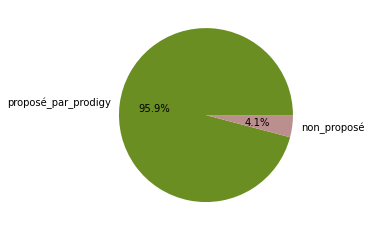

In [151]:
import matplotlib.pyplot as plt

labels = 'proposé_par_prodigy', 'non_proposé'
sizes = [len(reco)-len(lost), len(lost)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'])

In [152]:
from collections import Counter
dlost=dict(Counter(lost))
dpropose=dict(Counter(found))

In [1087]:
from collections import Counter
ds1=dict(Counter(recr.values()))
#dpropose=dict(Counter(found))

In [1088]:
ds1

{'-': 6167, '14': 1}

In [520]:
len(reco.values())

NameError: name 'reco' is not defined

In [154]:
dpropose

{'-': 9377, '8': 1449}

In [155]:
dlost

{'-': 412, '8': 51}

In [1063]:
id2label={'-':"indifférent",
 '0': 'absence_taba',
 '1': 'presence_taba',
 '2': 'ancien_taba',
 '3': 'absence_prof',
 '4': 'presence_prof',
 '5': 'absence_diab',
 '6': 'presence_diab',
 '7': 'absence_hyper',
 '8': 'presence_hyper',
 '9': 'absence_cardia',
 '10': 'presence_cardia',
 '11': 'absence_copd',
 '12': 'presence_copd',
 '13': 'absence_fam',
 '14': 'presence_fam'}

([<matplotlib.patches.Wedge at 0x7fed318707c0>,
 [Text(-1.0999998573208736, 0.0005602624901018073, 'indifférent'),
  Text(1.0999998573252279, -0.000560253941175707, 'presence_fam')],
 [Text(-0.599999922175022, 0.000305597721873713, '100.0%\n(6167)'),
  Text(0.599999922177397, -0.0003055930588231129, '0.0%\n(1)')])

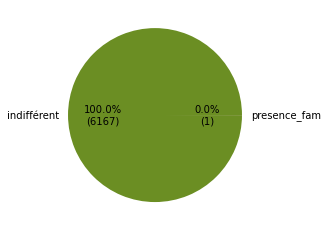

In [1089]:
import numpy as np
import matplotlib.pyplot as plt

labels = [id2label[e[0]] for e in sorted(ds1.items(), key=lambda x:x[0])]
sizes = [ds1[e[0]] for e in sorted(ds1.items(), key=lambda x:x[0])]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

#autopct='%1.1f%%',

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes),  colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'])

([<matplotlib.patches.Wedge at 0x7f78dae3b7c0>,
 [Text(-1.034791768438765, 0.3731031974821086, 'indifférent'),
  Text(1.034791785904985, -0.3731031490400095, 'presence_hyper')],
 [Text(-0.5644318736938718, 0.203510834990241, '89.0%'),
  Text(0.5644318832209009, -0.2035108085672779, '11.0%')])

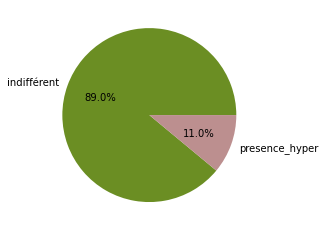

In [157]:
import matplotlib.pyplot as plt

labels = [id2label[e[0]] for e in sorted(dlost.items(), key=lambda x:x[0])]
sizes = [dlost[e[0]] for e in sorted(dlost.items(), key=lambda x:x[0])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'])

([<matplotlib.patches.Wedge at 0x7f78dae06ac0>,
 [Text(-1.034791768438765, 0.3731031974821086, 'indifférent'),
  Text(1.034791785904985, -0.3731031490400095, 'presence_hyper')],
 [Text(-0.5644318736938718, 0.203510834990241, '89.0%'),
  Text(0.5644318832209009, -0.2035108085672779, '11.0%')])

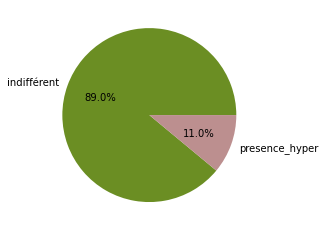

In [158]:
import matplotlib.pyplot as plt

labels = [id2label[e[0]] for e in sorted(dpropose.items(), key=lambda x:x[0])]
sizes = [dlost[e[0]] for e in sorted(dpropose.items(), key=lambda x:x[0])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'])

In [163]:
for d in lo:
    if d["accept"]==["7"]:
        print("yes")

## évaluer LLM

In [204]:
lb1=list()
with open("../jeu_de_test_llm/taba_llm3.txt", "r", encoding="utf-8") as l1:
    ll1=l1.readlines()
    for l in ll1:
        if len(l.strip().split("\t"))==2:
            lb1.append(l.strip().split("\t"))

In [205]:
lb0=list()
with open("../jeu_de_test_llm/taba.txt", "r", encoding="utf-8") as l0:
    ll0=l0.readlines()
    for l in ll0:
        if len(l.strip().split("\t"))==2:
            lb0.append(l.strip().split("\t"))

In [206]:
id2label = {'0': "indifferent", '1': "absence_taba", '2':"presence_taba", '3':"ancient_taba",}

In [207]:
lb0

[['- sur le plan gynécologique : nombreuses fausses couches, 2 enfants atteints de mucoviscidose décédés, une grossesse molaire, un enfant de 13 ans en bonne santé -Tabagisme actif -aucun,,Non,,(Mise à jour du 27/06/2013)',
  '2'],
 ['- BPCO post-tabagique stade I, suivi Dr ROUSSEL à Vezin.', '2'],
 ["Aucune interdose depuis hier matin 6h00. Mme [NOM_PATIENT] est peu visible aujourd'hui, souvent dehors pour fumer. J'essaierai de la voir plus précisément demain. 29/06/2018 10:09",
  '2'],
 ['BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE Chirurgicaux : Opération pour une malformation',
  '2'],
 ["Ce jeune patient de 26 ans, tabagique actif modéré (2,5 paquets/année) employé à l'Etablissement Français du Sang, sportif (course à pied) s'est vu découvrir fortuitement à l'occasion d'un passage aux Urgences Générales pour une sensation d'oppression thoracique",
  '2'],
 ["Des BEGP avait été recommandées mais refus du patient. Patient tabagiqu

In [208]:
def f1(l1,l2,a):
    vp=0
    fp=0
    fn=0
    for i in range(len(l1)):
        if l1[i]==a:
            if l2[i]==a:
                vp+=1
            else:
                fn+=1
        else:
            if l2[i]==a:
                fp+=1
    if (vp+fp)!=0:
        prec=vp/(vp+fp)
    else:
        prec=0
    if (vp+fn)!=0:
        rap=vp/(vp+fn)
    else:
        rap=0
    if (prec+rap)!=0:
        f1=2*(prec*rap)/(prec+rap)
    else:
        f1=0
    return f1
    #for e in l2:
    #    if e==a:
            

In [209]:
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(lb1,lb0):
    labels = [e[1] for e in lb0]
    #with open("output_pred.txt", "w", encoding="utf-8") as o:
    #    o.write(str(predictions))
    #    o.write(str(labels))
    predictions = [e[1] for e in lb1]
    
    concat=0
    
    dico_mesure=dict()
    
    for k in id2label:
        fk=f1(labels, predictions, k)
        lb=id2label[k]
        dico_mesure[lb]=fk
        concat+=fk
    macro=concat/len(id2label.keys())
    #macro=concat/3
    dico_mesure["macro_f1"]=macro
    
    return dico_mesure #{"macro_f1":macro}
        
    

In [203]:
compute_metrics(lb1,lb0)

{'indifferent': 0.7659574468085106,
 'absence_taba': 0.075,
 'presence_taba': 0.47572815533980584,
 'ancient_taba': 0.15053763440860213,
 'macro_f1': 0.36680580913922967}

In [210]:
compute_metrics(lb1,lb0)

{'indifferent': 0.9244288224956064,
 'absence_taba': 0.8222222222222222,
 'presence_taba': 0.7017543859649124,
 'ancient_taba': 0.6282051282051283,
 'macro_f1': 0.7691526397219672}

In [211]:
for i in range(len(lb0)):
    if lb1[i]!=lb0[i]:
        print(lb1[i])
        print(lb0[i])
        print("\n")

['- BPCO post-tabagique stade I, suivi Dr ROUSSEL à Vezin.', '3']
['- BPCO post-tabagique stade I, suivi Dr ROUSSEL à Vezin.', '2']


['BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE Chirurgicaux : Opération pour une malformation', '3']
['BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE Chirurgicaux : Opération pour une malformation', '2']


["- BPCO post tabagique (pas d'EFR, pas de traitement)", '3']
["- BPCO post tabagique (pas d'EFR, pas de traitement)", '2']


['- BPCO post-tabagique suivi par le Dr RENAUD à St', '3']
['- BPCO post-tabagique suivi par le Dr RENAUD à St', '2']


['BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE Opération pour une malformation', '3']
['BPCO post-tabagique (~30PA) pneumonie il y a 5 ans REIN DROIT ATROPHIQUE Opération pour une malformation', '2']


['- Facteurs de risques: Cardio-vasculaires: Tabagisme actif estimé à 25PA', "2 - La PHRASE implique que le patient a ac